# **TensorFlow** is an end-to-end platform for machine learning. 

It supports the following:

- **Numerical calculation** based on **multidimensional arrays** (similar to NumPy.)
- **GPU** and **distributed computing**
- Automatic **differentiation**
- **Build**, **train**, and **export models**

### **Tensors**
TensorFlow operates on **multidimensional arrays or tensors** represented as **tf objects**. Tensor. Here's a **two-dimensional tensor**:

In [2]:
import tensorflow as tf

x = tf.constant([[1., 2., 3.],
                 [4., 5., 6.]])

print(x)
print(x.shape)
print(x.dtype)

tf.Tensor(
[[1. 2. 3.]
 [4. 5. 6.]], shape=(2, 3), dtype=float32)
(2, 3)
<dtype: 'float32'>


The **most important attributes of a tf**. 
Tensor are its **shape** and **dtype**:

- **Tensor.shape** – indicates the **size of the tensor along each** of its **axes**.
- **Tensor.dtype**: Tells you the **type** of all elements in the tensor.
TensorFlow implements standard mathematical operations on tensors, as well as many specialized operations for machine learning.

In [3]:
# TensorFlow implements standard mathematical operations on tensors, as well as many specialized operations for machine learning.

x + x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 2.,  4.,  6.],
       [ 8., 10., 12.]], dtype=float32)>

In [4]:
5 * x

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[ 5., 10., 15.],
       [20., 25., 30.]], dtype=float32)>

In [ ]:
# Calcola la trasposta di x
x_transpose = tf.transpose(x)

# Moltiplicazione matrice-matrice tra x e la sua trasposta
result = x @ x_transpose

print("x:")
print(x.numpy())
print("\nTranspose of x:")
print(x_transpose.numpy())
print("\nResult of x @ tf.transpose(x):")
print(result.numpy())
# [[(1*1 + 2*2 + 3*3), (1*4 + 2*5 + 3*6)],
# [(4*1 + 5*2 + 6*3), (4*4 + 5*5 + 6*6)]]

x:
[[1. 2. 3.]
 [4. 5. 6.]]

Transpose of x:
[[1. 4.]
 [2. 5.]
 [3. 6.]]

Result of x @ tf.transpose(x):
[[14. 32.]
 [32. 77.]]


In [8]:
tf.concat([x, x, x], axis=0)

<tf.Tensor: shape=(6, 3), dtype=float32, numpy=
array([[1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.],
       [1., 2., 3.],
       [4., 5., 6.]], dtype=float32)>

In [9]:
tf.nn.softmax(x, axis=-1)

<tf.Tensor: shape=(2, 3), dtype=float32, numpy=
array([[0.09003057, 0.24472848, 0.6652409 ],
       [0.09003057, 0.24472848, 0.6652409 ]], dtype=float32)>

In [10]:
tf.reduce_sum(x)

<tf.Tensor: shape=(), dtype=float32, numpy=21.0>

**Performing large calculations** on the **CPU** can be slow. When configured correctly, **TensorFlow can use accelerator hardware** such as **GPUs** to perform operations very quickly.

In [11]:
if tf.config.list_physical_devices('GPU'):
  print("TensorFlow **IS** using the GPU")
else:
  print("TensorFlow **IS NOT** using the GPU")

TensorFlow **IS NOT** using the GPU


### **Variables**
Normal objects tf. **Tensors are immutable**. To **store model weights** (or other mutable state) in TensorFlow, **use a tf. Variable**.

In [13]:
var = tf.Variable([0.0, 0.0, 0.0])

In [14]:
var.assign([1, 2, 3])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([1., 2., 3.], dtype=float32)>

In [15]:
var.assign_add([1, 1, 1])

<tf.Variable 'UnreadVariable' shape=(3,) dtype=float32, numpy=array([2., 3., 4.], dtype=float32)>

### **Automatic differentiation**
**Gradient descent and related algorithms** are a cornerstone of modern machine learning.

To enable this, **TensorFlow implements automatic differentiation (autodiff)**, which uses **computation to calculate gradients**. You'll typically use it to **calculate the gradient of a model's error or loss** relative to its weights.

In [16]:
x = tf.Variable(1.0)

def f(x):
  y = x**2 + 2*x - 5
  return y

In [17]:
f(x)

<tf.Tensor: shape=(), dtype=float32, numpy=-2.0>

A $x = 1.0 , y = f(x) = (1**2 + 2*1 - 5) = -2$ .

The derivative of y is $y' = f'(x) = (2*x + 2) = 4$ . TensorFlow can calculate it automatically:

In [18]:
with tf.GradientTape() as tape:
  y = f(x)

g_x = tape.gradient(y, x)  # g(x) = dy/dx

g_x

<tf.Tensor: shape=(), dtype=float32, numpy=4.0>

This simplified example **takes only the derivative with respect to a single scalar (x)**, but **TensorFlow can compute the gradient** with respect to any number of nonscalar tensors at once.



### **Graphics and tf function**
Although you can use **TensorFlow** interactively like any Python library, TensorFlow also provides tools for:

- **Performance optimization**: to **speed up training and inference**.
- **Export**: so you can **save your model** when it has finished training.
- These require the use of tf.function to separate the pure TensorFlow code from Python.

In [19]:
@tf.function
def my_func(x):
  print('Tracing.\n')
  return tf.reduce_sum(x)

The **first time you run tf.function** , even though it runs in Python, **it captures a full**, **optimized graph** representing the **TensorFlow computations** performed inside the function.

In [20]:
x = tf.constant([10, 9, 8])
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=int32, numpy=27>

A graph may not be reusable for inputs with a different signature ( shape and dtype ), so a new graph is generated instead:

In [21]:
x = tf.constant([10.0, 9.1, 8.2], dtype=tf.float32)
my_func(x)

Tracing.



<tf.Tensor: shape=(), dtype=float32, numpy=27.299999237060547>

#### These captured **graphs offer two advantages:**

In **many cases they provide significant execution speed** (although not this trivial example).
You **can export these graphs**, using **tf.saved_model** , to run them on **other systems** such as a server or mobile device, without requiring Python to be installed.

### **Modules, Layers, and Models**
**tf.Module** is a **class for managing tf.Variable objects** and the **tf.function objects** that operate on them. The tf.Module class is needed to support **two significant features**:

- You can **save and restore the values ​​of your variables** using tf.train.Checkpoint . This is useful during training because it allows you to quickly save and restore the state of a model.
- You can **import and export tf.Variable values** ​​and **tf.function graphs** using **tf.saved_model**. This allows you to run your model independently of the Python program that created it.
Here is a complete example of exporting a simple **tf.Module object**

In [22]:
class MyModule(tf.Module):
  def __init__(self, value):
    self.weight = tf.Variable(value)

  @tf.function
  def multiply(self, x):
    return x * self.weight

In [23]:
mod = MyModule(3)
mod.multiply(tf.constant([1, 2, 3]))

<tf.Tensor: shape=(3,), dtype=int32, numpy=array([3, 6, 9], dtype=int32)>

Save the Module:

In [24]:
save_path = './saved'
tf.saved_model.save(mod, save_path)

INFO:tensorflow:Assets written to: ./saved\assets


INFO:tensorflow:Assets written to: ./saved\assets


The **tf.keras.layers.Layer** and **tf.keras.Model** classes **build on tf.Module** by providing **additional functionality** and convenience methods for **creating**, **training**, and **saving models**. Some of these are discussed in the next section.

In [26]:
import matplotlib.pyplot as plt
import matplotlib

In [27]:
matplotlib.rcParams['figure.figsize'] = [9, 6]

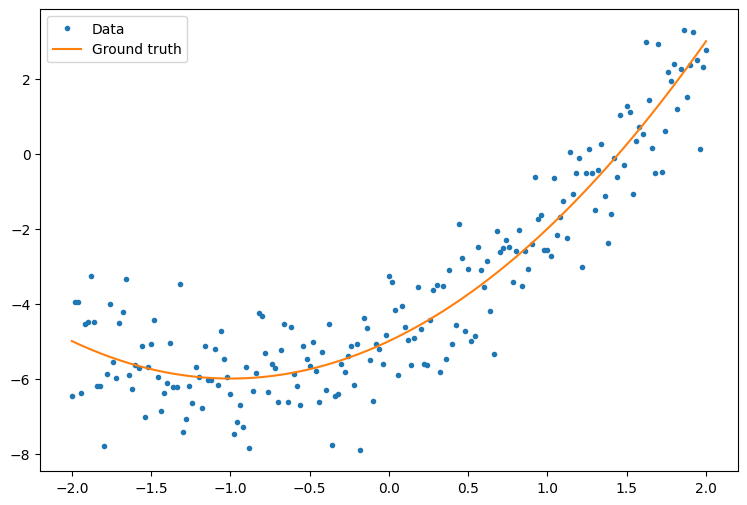

In [29]:
x = tf.linspace(-2, 2, 201)
x = tf.cast(x, tf.float32)

def f(x):
  y = x**2 + 2*x - 5
  return y

y = f(x) + tf.random.normal(shape=[201])

plt.plot(x.numpy(), y.numpy(), '.', label='Data')
plt.plot(x, f(x),  label='Ground truth')
plt.legend()

In [30]:
class Model(tf.keras.Model):
  def __init__(self, units):
    super().__init__()
    self.dense1 = tf.keras.layers.Dense(units=units,
                                        activation=tf.nn.relu,
                                        kernel_initializer=tf.random.normal,
                                        bias_initializer=tf.random.normal)
    self.dense2 = tf.keras.layers.Dense(1)

  def call(self, x, training=True):
    # For Keras layers/models, implement `call` instead of `__call__`.
    x = x[:, tf.newaxis]
    x = self.dense1(x)
    x = self.dense2(x)
    return tf.squeeze(x, axis=1)

In [31]:
model = Model(64)

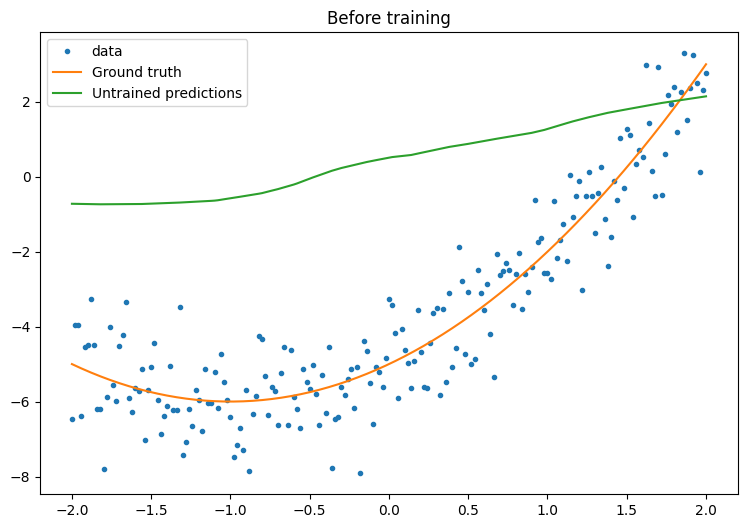

In [32]:
plt.plot(x.numpy(), y.numpy(), '.', label='data')
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Untrained predictions')
plt.title('Before training')
plt.legend();

In [33]:
variables = model.variables

optimizer = tf.optimizers.SGD(learning_rate=0.01)

for step in range(1000):
  with tf.GradientTape() as tape:
    prediction = model(x)
    error = (y-prediction)**2
    mean_error = tf.reduce_mean(error)
  gradient = tape.gradient(mean_error, variables)
  optimizer.apply_gradients(zip(gradient, variables))

  if step % 100 == 0:
    print(f'Mean squared error: {mean_error.numpy():0.3f}')

Mean squared error: 21.281
Mean squared error: 0.970
Mean squared error: 0.960
Mean squared error: 0.955
Mean squared error: 0.952
Mean squared error: 0.949
Mean squared error: 0.946
Mean squared error: 0.944
Mean squared error: 0.943
Mean squared error: 0.942


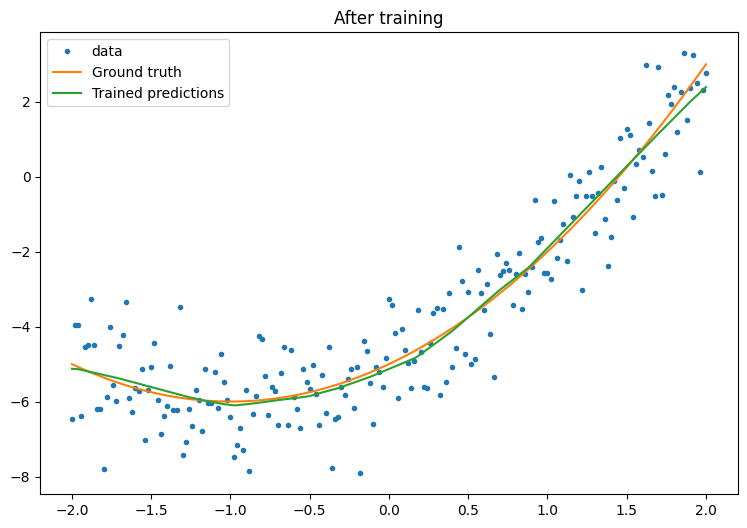

In [35]:
plt.plot(x.numpy(),y.numpy(), '.', label="data")
plt.plot(x, f(x),  label='Ground truth')
plt.plot(x, model(x), label='Trained predictions')
plt.title('After training')
plt.legend()

In [ ]:
new_model = Model(64)

In [ ]:
new_model.compile(
    loss=tf.keras.losses.MSE,
    optimizer=tf.optimizers.SGD(learning_rate=0.01))

history = new_model.fit(x, y,
                        epochs=100,
                        batch_size=32,
                        verbose=0)

model.save('./my_model')

In [ ]:
plt.plot(history.history['loss'])
plt.xlabel('Epoch')
plt.ylim([0, max(plt.ylim())])
plt.ylabel('Loss [Mean Squared Error]')
plt.title('Keras training progress');